In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [2]:
import importlib
import sys
from pathlib import Path
import os 
sys.path.append(str(Path(os.getcwd()).parent / "src"))

import active_gel
importlib.reload(active_gel)

<module 'active_gel' from '/Users/yuli/Documents/Code/Cleavage/src/active_gel.py'>

In [3]:
def make_movie(rhos, Qs, qs, vs):
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
  
    vmin = np.amin(rhos)
    vmax = np.amax(rhos)
    Qx, Qy = nematic_to_xy(Qs[-1].T, qs[-1].T)
    
    p1 = ax[0].imshow(rhos[0].T, vmin=vmin, vmax=vmax, cmap='Greys')
    fig.colorbar(p1, ax=ax[0], shrink=0.8)
    ax[0].quiver(Qx, Qy, headlength=0, headwidth=0, headaxislength=0)
    ax[0].axis('off')
    
    
    p2 = ax[1].quiver(Qx, Qy, headlength=0, headwidth=0, headaxislength=0)
    ax[1].axis('off')
    
    panels = [p1, p2]
    
    def animate(i): 

        panels[0].set_data(rhos[i].T)
        Qx, Qy = nematic_to_xy(Qs[i].T, qs[i].T)
        panels[1].set_UVC(Qx, Qy)
        return panels

    ani = animation.FuncAnimation(fig, animate, interval=50, blit=True,
                                    repeat_delay=1000, frames=rhos.shape[0])
    plt.close() 
    return ani 

def nematic_to_xy(Q, q):
    theta = np.arctan2(-q, Q)
    A = np.sqrt(Q**2 + q**2)
    return A*np.cos(theta/2), A*np.sin(theta/2)

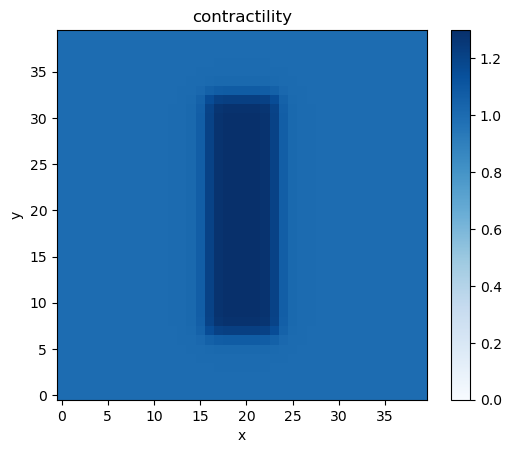

In [30]:
b1 = 0.3/2.35# nematic coupling to velocity 
b2 = 0.1 # diffusion constant of actin 
chi = 1 # parameter of the free energy 
kappa = 3/2.35  # parameter of the free energy 
etas = [0.1, 0] # eta0: viscosity , eta1: compressibility
xi = 0.05 # contractility of actin
zeta = 0.6 # contribution of nematic order to active stress 
k = 0.05 # density decay rate 
gamma = 0.1 # friction 

L = 40
T = 10
n_frames = int(T)

init = np.zeros((L*L*3))
init[-L*L:] = np.random.normal(scale=0.01, size=L*L)+1
    

indices = np.linspace(0, L, L) - L/2 
y, x = np.meshgrid(indices, indices)
source = lambda t: np.ones((L, L)) + 0.3*(1 - np.tanh((np.abs(x)-(L/10))))/2*(1 - np.tanh((np.abs(y)-(L/3))))/2

# + 0.5*(1 - np.tanh((np.abs(x)-(L/8))))/2 *(1 - np.tanh((np.abs(y)-(L/8))))/2

plt.title('contractility')
plt.imshow(source(0).T, vmin=0, cmap='Blues', origin='lower')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [31]:

m = active_gel.ActiveGel2D(b1, b2, chi, kappa, etas, xi, zeta, k, gamma, source)
m.initialise(L, T, n_frames, init=init)
m.evolve()

0.00017898737504524207 0.00017770770145682146


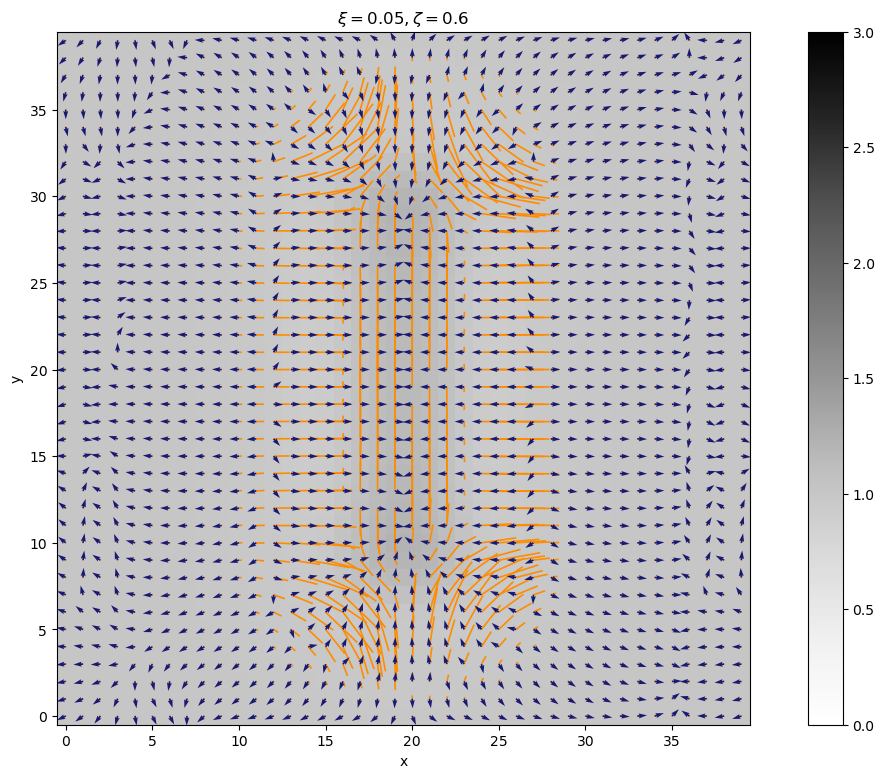

In [35]:
v_hat = m.v/np.sqrt(np.sum(m.v**2, axis=1))[:, np.newaxis]

t = -1
Qx, Qy = nematic_to_xy(m.Q[t].T, m.q[t].T)

# print(np.max(np.abs(Qx)), np.max(np.abs(Qy)))
plt.figure(figsize=(15, 9))
plt.quiver(Qx, Qy, color='darkorange', headlength=0, headwidth=0, headaxislength=0)
plt.quiver(v_hat[t, 0].T, v_hat[t, 1].T, color='midnightblue')
plt.imshow(m.rho[t].T, origin='lower', cmap='Greys', vmin=0, vmax=3)
plt.title(r'$\xi ={{{}}}, \zeta={{{}}}$'.format(xi, zeta))
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

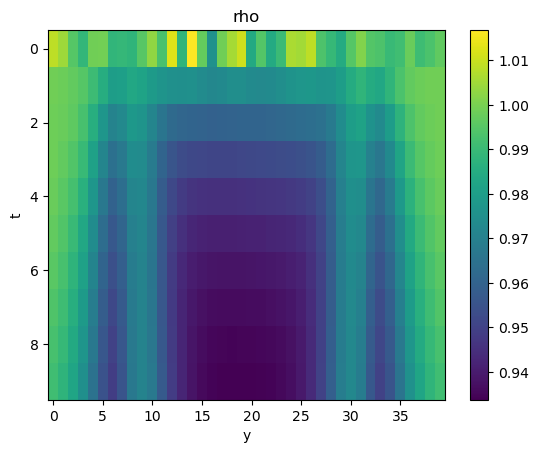

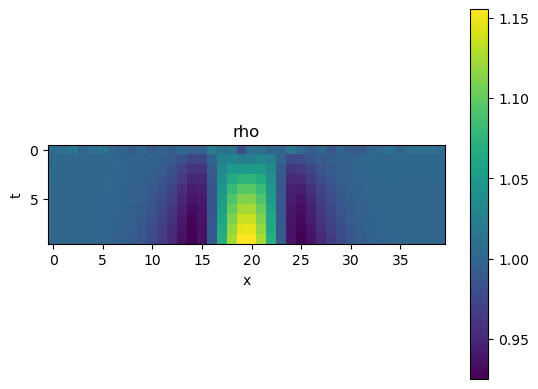

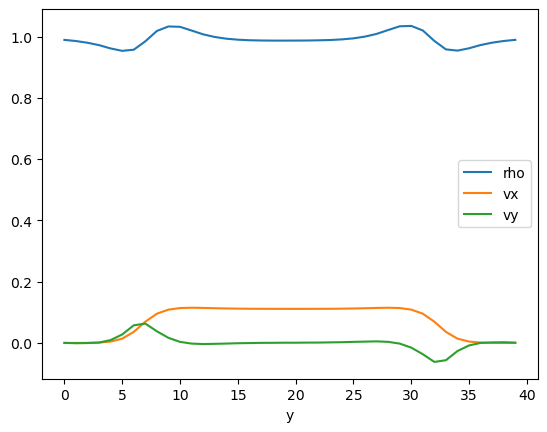

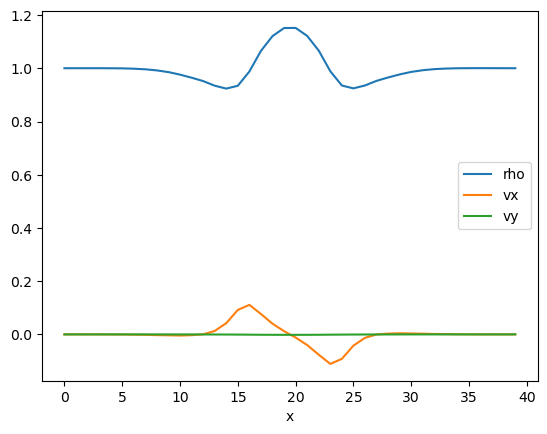

In [33]:
plt.imshow(m.rho[:, 15], aspect='auto')
plt.xlabel('y')
plt.ylabel('t')
plt.title('rho')
plt.colorbar() 
plt.show() 

plt.imshow(m.rho[:, :, 15])
plt.xlabel('x')
plt.ylabel('t')
plt.title('rho')
plt.colorbar() 
plt.show() 

plt.plot(m.rho[-1, 16], label='rho')
plt.plot(m.v[-1, 0, 16], label='vx')
plt.plot(m.v[-1, 1, 16], label='vy')
plt.legend()
plt.xlabel('y')
plt.show() 

plt.plot(m.rho[-1, :, 16], label='rho')
plt.plot(m.v[-1, 0, :, 16], label='vx')
plt.plot(m.v[-1, 1, :, 16], label='vy')
plt.legend()
plt.xlabel('x')
plt.show() 

In [74]:
ani = make_movie(rho[::1], Q[::1], q[::1])

Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=2000)

ani.save('sim.mp4', writer=writer, dpi=200)

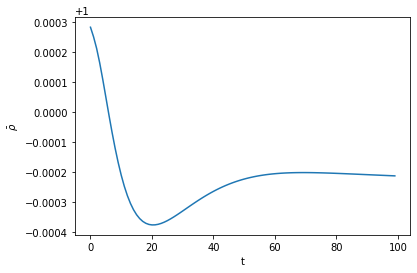

In [10]:
plt.plot(np.mean(rho, axis=(-1, -2)))
plt.xlabel('t')
plt.ylabel(r'$\bar{\rho}$')
plt.show() 